In [1]:
%matplotlib inline

#### 深度学习基础及数学原理

##### 监督学习和无监督学习

监督学习、无监督学习、半监督学习、强化学习是我们日常接触到的常见的四个机器学习方法：
- 监督学习：通过已有的训练样本（即已知数据以及其对应的输出）去训练得到一个最优模型（这个模型属于某个函数的集合，最优则表示在某个评价准则下是最佳的），再利用这个模型将所有的输入映射为相应的输出。
- 无监督学习：它与监督学习的不同之处，在于我们事先没有任何训练样本，而需要直接对数据进行建模。
- 半监督学习 ：在训练阶段结合了大量未标记的数据和少量标签数据。与使用所有标签数据的模型相比，使用训练集的训练模型在训练时可以更为准确。
- 强化学习：我们设定一个回报函数（reward function），通过这个函数来确认否越来越接近目标，类似我们训练宠物，如果做对了就给他奖励，做错了就给予惩罚，最后来达到我们的训练目的。
  
##### 线性回归

线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，运用十分广泛。其表达形式为y = w'x+e，e为误差服从均值为0的正态分布。

线性回归对于输入x与输出y有一个映射f，y=f(x),而f的形式为aX+b。其中a和b是两个可调的参数，我们训练的时候就是训练a，b这两个参数。

下面我们来用PyTorch的代码来做一个详细的解释：

In [2]:
import torch
from torch.nn import Linear, Module, MSELoss
from torch.optim import SGD
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

torch.__version__

'2.8.0'

下面定义一个线性函数，这里使用 $y = 5x + 7 $，这里的5和7就是上面说到的参数a和b，我们先使用matplot可视化一下这个函数

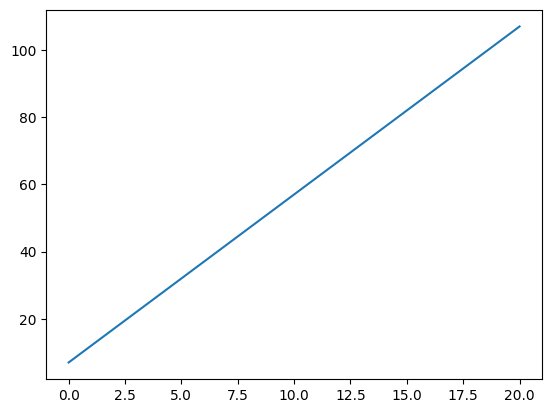

In [3]:
x = np.linspace(0, 20, 500)
y = 5 * x + 7
plt.plot(x, y)

下面生成一些随机的点，来作为训练数据

In [4]:
x = np.random.rand(256)
noise = np.random.randn(256) / 4
y = 5 * x + 7 + noise
df = pd.DataFrame()
df['x'] = x
df['y'] = y

在图上显示下我们生成的数据

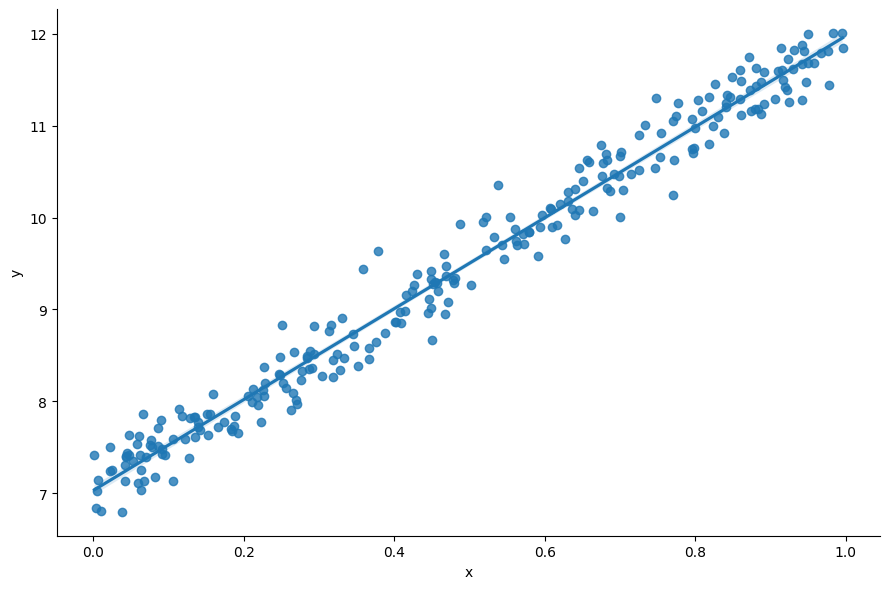

In [5]:
sns.lmplot(x='x', y='y', data=df, height=6, aspect=1.5)

我们随机生成了一些点，下面将使用PyTorch建立一个线性的模型来对其进行拟合，这就是所说的训练的过程，由于只有一层线性模型，所以我们就直接使用了

In [6]:
model = Linear(1, 1)

其中参数(1, 1)代表输入输出的特征(feature)数量都是1。`Linear`模型的表达式是 $y=wx+b$，其中其中w代表权重，b代表偏置

损失函数我们使用均方损失函数：`MSELoss`

In [7]:
criterion = MSELoss()

优化器我们选择最常见的优化方法`SGD`，就是每一次迭代计算`mini-batch`的梯度，然后对参数进行更新，学习率 0.01 

In [8]:
optim = SGD(model.parameters(), lr = 0.01)
epochs = 3000

准备训练数据：`x_train`,`y_train`的形状是 (256, 1)， 代表`mini-batch`大小为256，`feature`为1。
`astype('float32')`是为了下一步可以直接转换为`torch.float`

In [9]:
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

In [10]:
for i in range(epochs):
    # 整理输入和输出的数据，这里输入和输出一定要是torch的Tensor类型
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)

    # 使用模型进行预测
    outputs = model(inputs)

    # 梯度置0，否则会累加
    optim.zero_grad()

    # 计算损失
    loss = criterion(outputs, labels)

    # 反向传播
    loss.backward()

    # 使用优化器默认方法优化
    optim.step()
    if (i % 100 == 0):
        print('epoch{}, loss{: 1.4f}'.format(i, loss.data.item()))

epoch0, loss 93.0598
epoch100, loss 0.8264
epoch200, loss 0.1965
epoch300, loss 0.1576
epoch400, loss 0.1311
epoch500, loss 0.1113
epoch600, loss 0.0965
epoch700, loss 0.0854
epoch800, loss 0.0771
epoch900, loss 0.0709
epoch1000, loss 0.0662
epoch1100, loss 0.0627
epoch1200, loss 0.0601
epoch1300, loss 0.0582
epoch1400, loss 0.0567
epoch1500, loss 0.0556
epoch1600, loss 0.0548
epoch1700, loss 0.0542
epoch1800, loss 0.0537
epoch1900, loss 0.0534
epoch2000, loss 0.0531
epoch2100, loss 0.0529
epoch2200, loss 0.0528
epoch2300, loss 0.0526
epoch2400, loss 0.0526
epoch2500, loss 0.0525
epoch2600, loss 0.0525
epoch2700, loss 0.0524
epoch2800, loss 0.0524
epoch2900, loss 0.0524


In [11]:
[w, b] = model.parameters()  #用model.parameters()提取模型参数。
print(w.item(), b.item())

4.921579360961914 7.042489528656006


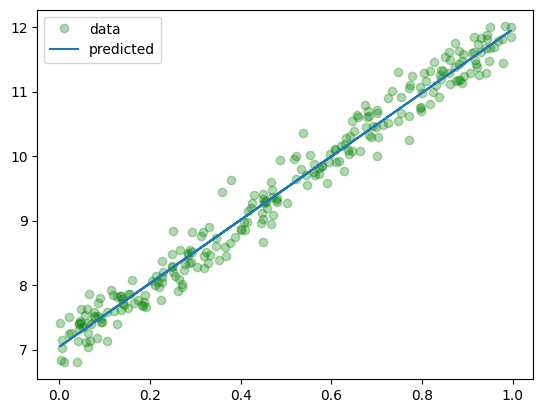

In [12]:
# 可视化模型
predicted = model.forward(torch.from_numpy(x_train)).data.numpy()
plt.plot(x_train, y_train, 'go', label = 'data', alpha = 0.3)
plt.plot(x_train, predicted, label = 'predicted', alpha = 1)
plt.legend()
plt.show()

#### 损失函数（Loss Function）

损失函数是用来估量模型的预测值与真实值的不一致程度，它是一个非负实值函数，损失函数越小，模型的稳健性越好。

我们训练模型的过程，就是通过不断地迭代计算，使用梯度下降地优化算法，使得损失函数越来越小。损失函数越小就表示算法达到意义上的最优。

这里有一个重点：因为PyTorch是使用mini-batch来进行计算的，所以损失函数的计算出来的结果已经对mini-batch取了平均

常见（PyTorch内置）的损失函数有以下几个：
- `nn.L1Loss`:输入x和目标y之间差的绝对值，要求x和y的维度一样（可以是向量或矩阵），得到的loss维度也是对应一样的。 $$loss(x, y) = 1/n \sum{|x_i - y_i|}$$
- `nn.NLLoss`:用于多分类的负对数似然函数损失值。 $$loss(x, class) = -x[class]$$ 如果传递了weights参数，会对损失进行加权，公式就变成了 $$ loss(x, class) = - weights[class] * x[class] $$
- `nn.MSELoss`:均方损失函数，输入x和目标y之间的均方差。 $$loss(x, y) = 1/n \sum{(x_i - y_i)^2}$$
- `nn.CrossEntropyLoss`:多分类用的交叉熵损失函数，`LogSoftMax`和`NLLLoss`集成到一个类中，会调用`nn.NLLLoss`函数，我们可以理解为 $CrossEntropyLoss()=logsoftmax() + NLLLoss()$   $$loss(x, class) = -log\frac{exp(x[class])}{\sum_j{exp(x[j])}} = -x[class] + log(\sum_j{exp(x[j])})$$   因为使用了`NLLLoss`，所以也可以传入weight参数，这时loss的计算公式变为：$$loss(x, class) = weights[class] * (-x[class] + log(\sum_j{exp(x[j])}))$$ 所以一般多分类情况会用这个损失函数
- `nn.BCELoss`:计算$x$与$y$之间的二进制交叉熵。 $$loss(o, t) = -\frac{1}{n} \sum_i{(t[i] * log(o[i]) + (1-t[i])* log(1 - o[i]))}$$  与`NLLLoss`类似，也可以添加权重参数 $$loss(o, t) = -\frac{1}{n} \sum_i{weights[i]*((t[i] * log(o[i]) + (1-t[i])* log(1 - o[i])))}$$  用的时候需要在该层前面加上Sigmoid函数。

#### 梯度下降
梯度下降是一个使损失函数越来越小的优化算法，在求解机器学习算法的模型参数，即约束优化问题时，梯度下降（Gradient Descent）是最常采用的方法之一。

##### 梯度
在微积分里面，对多元参数的求偏导数，把求得的各个参数的偏导数以向量的形式写出来，就是梯度。例如函数$f(x,y)$，分别对x，y求偏导数，求得的梯度向量就是$\left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)^{\!\top}$，简称 $\operatorname{grad} f(x,y)$ 或 $\nabla f(x,y)$。

几何上讲，梯度就是函数变化增加最快的地方，沿着梯度向量的方向，更加容易找到函数的最大值。反过来说，沿着梯度向量相反的方向梯度减少最快，也就是更加容易找到最小值。

##### Mini-batch的梯度下降法
对整个训练集进行梯度下降法的时候，我们必须处理整个训练数据集，然后才能进行一步梯度下降，即每一步梯度下降法需要对整个训练集进行一次处理，如果训练数据集很大的时候处理速度会很慢，而且也不可能一次的载入到内存或者显存中，所以我们会把大数据集分成小数据集，一部分一部分的训练，这个训练子集即称为Mini-batch。

对于普通的梯度下降法，一个epoch只能进行一次梯度下降；而对于Mini-batch梯度下降法，一个epoch可以进行Mini-batch的个数次梯度下降。

- 如果训练样本的大小比较小时，能够一次性的读取到内存中，那我们就不需要使用Mini-batch，
- 如果训练样本的大小比较大时，一次读入不到内存或者现存中，那我们必须要使用 Mini-batch来分批的计算
- Mini-batch size的计算规则如下，在内存允许的最大情况下使用2的N次方个size

`torch.optim`是一个实现了各种优化算法的库。大部分常用优化算法都有实现，我们直接调用即可。

- `troch.optim.SGD`:随机梯度下降算法，带有动量（momentum）的算法，作为一个可选参数，可以进行设置。样例如下：

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum= 0.9)

- `torch.optim.RMSprop`:除了以上的带有动量Momentum梯度下降算法外，RMSprop（root mean square prop）也是一种可以加快梯度下降的算法，利用RMSprop算法，可以减小某些维度梯度更新波动较大的情况，使其梯度下降的速度变得更快

In [14]:
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.01, alpha = 0.99)

- `torch.optim.Adam`:Adam 优化算法的基本思想就是将 Momentum 和 RMSprop 结合起来形成的一种适用于不同深度学习结构的优化算法

In [15]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, betas = (0.9, 0.999), eps = 1e-08)

#### 方差/偏差
- 偏差度量了学习算法的期望预测与真实结果的偏离程序，即刻画了学习算法本身的拟合能力
- 方差度量了同样大小的训练集的变动所导致的学习性能的变化，即模型的泛化能力

高偏差（high bias）的情况，一般称为欠拟合（underfitting），即我们的模型并没有很好的去适配现有的数据，拟合度不够。

高方差（high variance）的情况一般称作过拟合（overfitting），即模型对于训练数据拟合度太高了，失去了泛化的能力。

欠拟合：
- 增加网络结构，如增加隐藏层数目；
- 训练更长时间；
- 寻找合适的网络架构，使用更大的NN结构；

过拟合:
- 使用更多的数据；
- 正则化（regularization）；
- 寻找合适的网络结构；

例如我们上面的例子，可以计算出我们的偏差:

In [17]:
print(5-w.data.item(), 7-b.data.item())

0.07842063903808594 -0.04248952865600586


#### 正则化
利用正则化来解决High variance 的问题，正则化是在 Cost function 中加入一项正则化项，惩罚模型的复杂度。

- L1正则化：损失函数基础上加上权重参数的绝对值 $L = E _{in} + \lambda\sum_j{|w_j|}$
- L2正则化：损失函数基础上加上权重参数的平方和 $L = E _{in} + \lambda\sum_j{w_j^2}$

需要说明的是：$l_1$ 相比于 $l_2$ 会更容易获得稀疏解
